#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**
####**created by: Suprava Das**

# **Submitted by: Himadri Dhang**

# **Problem Statement:**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Preprocessing**

In [ ]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/MyDrive/IDEAS-TIH/Internship 2025/Fake.csv')
true_news_data = pd.read_csv('/content/drive/MyDrive/IDEAS-TIH/Internship 2025/True.csv')

**Q1.** View the imported csv file data using Pandas Dataframe.

In [ ]:
print(f"fake_news_data:\n{fake_news_data.head(10)}", end="\n\n\n")
print(f"true_news_data:\n{true_news_data.head(10)}")

#fake_news_data[]

fake_news_data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day m

In [ ]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [ ]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [ ]:
df2=df.dropna()
df2

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


**Q3.** shuffle the data.

In [ ]:
df2.sample(frac=1)

,title,text,subject,date,class
19750,MEET LEFTIST ANALYSTS At Research Firm Who Cre...,Many Americans were shocked by the latest ABC/...,left-news,"Oct 23, 2016",1
8089,Trump Jr. tweet likening Syrian refugees to po...,NEW YORK (Reuters) - The maker of Skittles can...,politicsNews,"September 20, 2016",0
10596,Super Tuesday showdown: How the South won the ...,ATLANTA (Reuters) - Things were not looking to...,politicsNews,"February 29, 2016",0
20031,Japan's Suga: government strongly protests lat...,TOKYO (Reuters) - North Korea fired a ballisti...,worldnews,"September 14, 2017",0
20117,EPIC NEWS CONFERENCE About Milwaukee Riots DEM...,Bravo Sheriff Clarke! Registered Democrat Sher...,left-news,"Aug 15, 2016",1
...,...,...,...,...,...
6551,Calm Down! Democrats Are Going To Stomp Trump...,After Tuesday s semi-coronation of Donald Trum...,News,"May 4, 2016",1
12638,Pope prays for nuclear disarmament,MILAN (Reuters) - Pope Francis on Sunday calle...,worldnews,"December 10, 2017",0
258,The Justice Department Just Said It’s Legal T...,In the Trump administration s ongoing war on t...,News,"October 5, 2017",1
18732,Turkish military kills three PKK militants in ...,"DIYARBAKIR, Turkey (Reuters) - The Turkish mil...",worldnews,"September 29, 2017",0


In [ ]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
# view top 100 rows of processed dataset
df.head(100)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
95,Roy Moore Supporting Republican LOSES It Afte...,If the scandal around the stories of Alabama S...,News,"November 14, 2017",1
96,That Story Trump Just Told The Press About Ob...,"On Tuesday, Donald Trump told a story about Ai...",News,"November 14, 2017",1
97,This 4-Year Old Tweet From Donald Trump Shows...,After Hollywood producer Harvey Weinstein was ...,News,"November 13, 2017",1
98,OOPS: Trump Judicial Nominee Didn’t Tell Cong...,This is a major conflict of interest that shou...,News,"November 13, 2017",1


**Q4.** view the text content of a random data point.

In [ ]:
df.sample(n=1) # to see content of a random data-point.
#df.iloc[39055] #to see content of a pre-specified data-point

,title,text,subject,date,class
18052,"NANCY PELOSI, DEMOCRATS and ANTIFA Force Conse...",Joey Gibson of the group Patriot Prayer had pl...,left-news,"Aug 27, 2017",1


**Data Visualization**

Text(0, 0.5, 'Number of News')

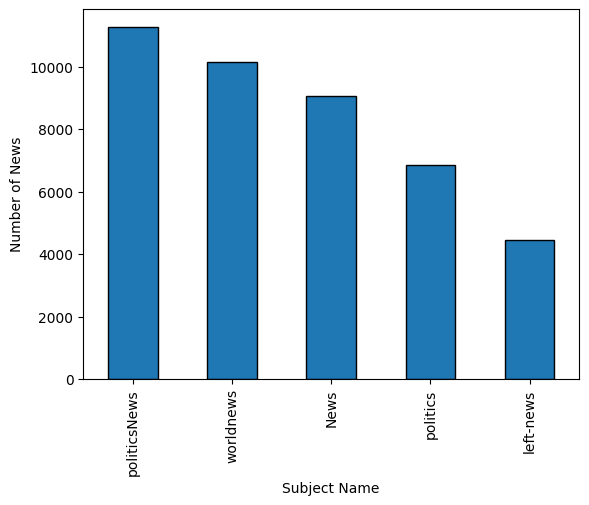

In [ ]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

Text(0.5, 1.0, 'Percentage of news on different subject')

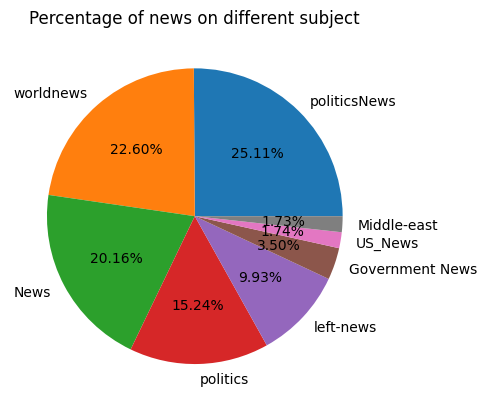

In [ ]:
top_subjects = (df['subject'].value_counts())
#print(top_subjects)
plt.pie(top_subjects,labels=top_subjects.index,autopct='%2.2f%%',)
plt.title("Percentage of news on different subject")

**Text Processing**

In [ ]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [ ]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)
df1

,text,class
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [ ]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'former vice president joe biden was asked on monday by matt lauer on nbc s today to name something specific that donald trump has been doing well well that seems like a trick question since trump has passed no major legislation and reaches across the aisle only to take shots at democrats in his twitter timeline during his morning rage tweets so biden struggled to find something anything that trump has done well since taking office i think there s a number of things he s doing well but even the things he s doing well it s how he does them biden said it s more the tone of this administration that bothers me he continued with all due respect you haven t come up with one thing you think he s doing well lauer said well i think he married very well biden joked although biden didn t mention which of trump s three marriages he s speaking of trump s first marriage to ivana ended after he had an affair with marla maples trump went on to marry maples then they divorced trump is currently married

# **Building Model**

In [ ]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25)

## **Word Embedding ( Word2Vec )**

In [ ]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [ ]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [ ]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

#xv_train
#xv_test

##**Logistic Regression**

In [ ]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 0 1 1]
Accuracy Score on Test Data:  0.9399554565701559


####**Accuracy Checking**

In [ ]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9399554565701559
Precision: 0.9437521633783316
Recall: 0.9398483281627025
F1 score: 0.9417962003454231


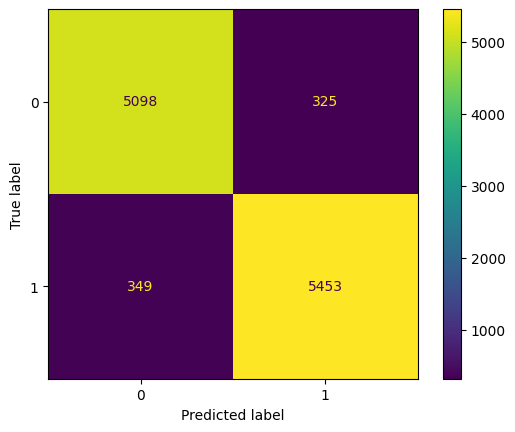

In [ ]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    random_state=42,     # Reproducibility purpose
    max_depth=10,        # Maximum depth of trees
    min_samples_split=5, # Minimum samples required to split a node
    min_samples_leaf=2   # Minimum samples required at a leaf node
)
print("\nTraining Random Forest Classifier...")
rf_classifier.fit(xv_train, y_train)

y_pred = rf_classifier.predict(xv_test)
print(f"Predictions completed!\n {y_pred}")




Training Random Forest Classifier...
Predictions completed!
 [1 0 0 ... 0 1 1]


####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

Accuracy: 0.9165256124721604
Precision: 0.9259324111364035
Recall: 0.9114098586694244
F1 score: 0.9186137409884478


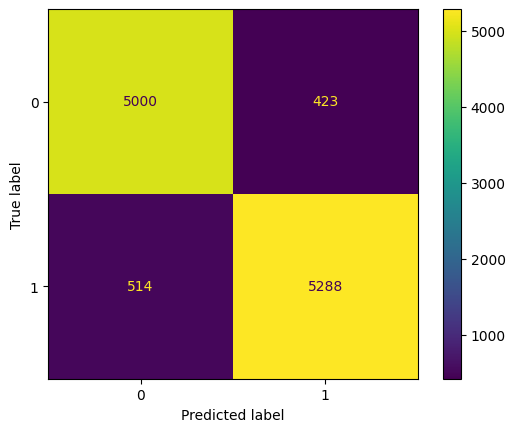

In [ ]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

#**Save the Model using pickle**

In [ ]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/MyDrive/IDEAS-TIH/Internship 2025/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [ ]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9399554565701559


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [ ]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/MyDrive/IDEAS-TIH/Internship 2025/word2vec_rf_classifier.pickle'
pickle.dump(rf_classifier, open(filename1, 'wb'))

**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The dataset can also be downloaded from kaggle using the link: www.kaggle.com/datasets/vishakhdapat/fake-news-detection

df3=pd.read_csv('/content/drive/MyDrive/IDEAS-TIH/Internship 2025/fake_and_real_news.csv')
for i in range(df3.shape[0]):
  if df3['label'][i]=='Fake':
    df3.loc[i, "class"] = 1   #Fake News->1
  else:
    df3.loc[i, "class"] = 0   #True News->0



In [ ]:
# drop unnecessary columns for classification purpose
df4= df3.drop(['label'],axis=1)

In [ ]:
# Separate independent and target columns from the dataset and stored them in x & y variables
X= df4['Text']
Y= df4['class']

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.30)

In [ ]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
# convert train and test dataset into vector form
XV_train = np.array([vectorize(sentence) for sentence in X_train])
XV_test = np.array([vectorize(sentence) for sentence in X_test])

In [ ]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(XV_test, Y_test)
print(result)

0.9057239057239057


**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.




